In [1]:
import cv2
import torch
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

from code_programm.path import get_path_weight_model


In [2]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name())

1
NVIDIA GeForce GTX 1080 Ti


In [3]:
model = YOLO(get_path_weight_model('best_v2_n.pt'))

img = cv2.imread(r'C:\PycharmProjects\ETS_Autopilot\static\settings_cache\1708818112.041754.png')
results = model(img)


0: 512x512 3 markups, 2 markup_lines, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 615.1ms postprocess per image at shape (1, 3, 512, 512)


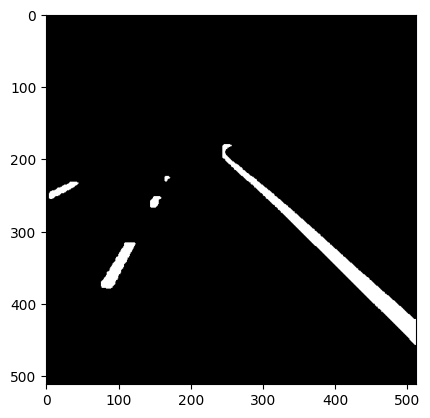

In [4]:
import numpy as np


size = 512
# Создание пустого массива для хранения объединенных масок
combined_mask = np.zeros((size, size))

# Перебор всех масок
for i in results[0].masks.data:
    # Добавление каждой маски к объединенному массиву
    combined_mask += i.cpu().numpy()

# Преобразование объединенного массива в тип uint8
combined_mask.astype(np.uint8)
# Сохранение объединенного массива в файл
plt.imshow(combined_mask, 'gray')